# Homework 2: Trees and Calibration


## Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

**Make sure to use the dataset that we provide in CourseWorks/Classroom.**

**There are a lot of applied questions based on the code results. Please make sure to answer them all. These are primarily to test your understanding of the results your code generate (similar to any Data Science/ML case study interviews).**



```
# This is formatted as code
```
Spring 2023 4995
## Name: Liang Zhao

## UNI: lz2871

## The Dataset


### Description

This data set contains details of ecommerce product shipment tracking and the target variable is a binary variable reflecting the fact whether the product reached on time or not.

In [448]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

## Question 1: Decision Trees

**1.1: Load the provided dataset**

In [711]:
## YOUR CODE HERE
df  = pd.read_csv("/Users/liangzhao/Desktop/W4995/hmwk2_4995_2022/aml-spring2023-assignment2-liang0711/data.csv")

df.head(10)
df.Reached_On_Time.value_counts()

1    6563
0    4436
Name: Reached_On_Time, dtype: int64

In [450]:
df.shape


(10999, 12)

**1.2: Are there any missing values in the dataset?**

- there are no missing value 


In [712]:
## YOUR CODE HERE

missing_values = df.isnull()

missing_values.sum()

# Check which values are missing
missing_values = df.isna()
missing_values

print(missing_values.sum(axis=0))
print("``2```")
# Count the number of missing values in each row
print(missing_values.sum(axis=1))

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached_On_Time        0
dtype: int64
``2```
0        0
1        0
2        0
3        0
4        0
        ..
10994    0
10995    0
10996    0
10997    0
10998    0
Length: 10999, dtype: int64


**1.3: Plot side-by-side bars of class distribtuion for each category for the categorical feature and the target categories.**


/var/folders/9k/znvz547n28q5p5rm8qtkt5w80000gn/T/ipykernel_37070/3865758254.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Reached_On_Time'] = df_1['Reached_On_Time'].astype(str)


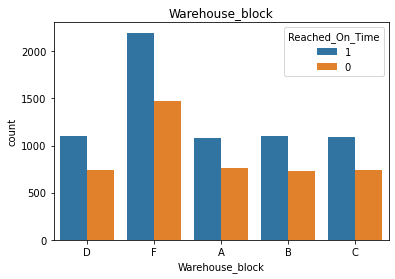

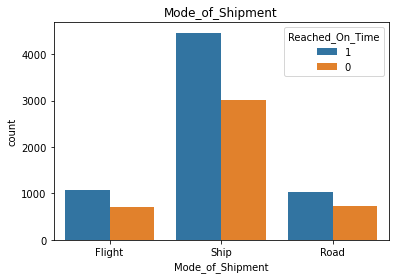

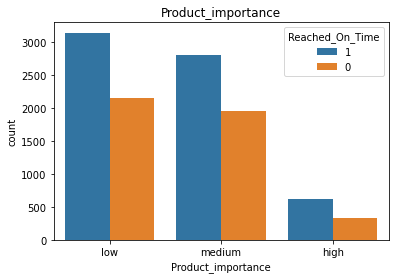

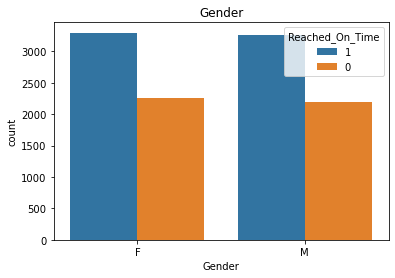

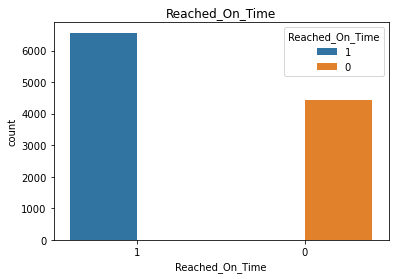

In [481]:
## YOUR CODE HERE
df_1=df[['Warehouse_block','Mode_of_Shipment','Product_importance','Gender','Reached_On_Time']]
df_1.head(10)
df_1['Reached_On_Time'] = df_1['Reached_On_Time'].astype(str)
df_1['Reached_On_Time']
col_names=df_1.columns.tolist()
col_names

# Loop over the variables and the Axes objects
for col in col_names:
    sns.countplot(x=col, data=df_1,hue=df_1.Reached_On_Time)
    plt.title(col)
    plt.show()
    print()


**1.4: Explain the distribution of the target variable and the dataset.**

- **we obseve that the data is imbalanced and have 4:6 ratio for class 0 and class1**


- for warehouse: F has high frequency of reach_on_time as well as high amount of reach_not_on_time; in average, all locations have high freq reach_on_time than reach_not_on_time. 
- for mode_shipment: ship has higher number of reach_on_time
- for product_importance: low/meidum/high: reach_on_time's freq is higher than not_reach_on_time



Text(0.5, 1.0, 'calss distribution for Reached_On_Tiime')

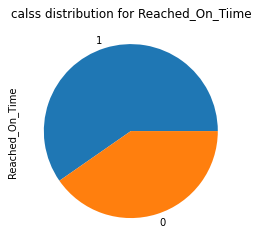

In [482]:
df['Reached_On_Time'].value_counts().plot(kind="pie")
plt.title("calss distribution for Reached_On_Tiime")

**1.5: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

**Hint: Based on the distribution of the data, try to use the best splitting strategy.**

In [713]:
## better solution:
X= df.drop(['Reached_On_Time'], axis=1)
X.columns
y=df['Reached_On_Time']
X_train_c,X_test_c,y_train_c,y_test_c = train_test_split(X, y, test_size=0.2,stratify=y, random_state=123)



#Sort by index and drop new coloumn created by the preprocessing
y_train_c=y_train_c.sort_index(ascending=True)
X_train_c=X_train_c.sort_index(ascending=True)
X_test_c=X_test_c.sort_index(ascending=True)
y_test_c=y_test_c.sort_index(ascending=True)

In [714]:
X_train_c

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,1,D,Flight,4,2,177,3,low,F,44,1233
2,3,A,Flight,2,2,183,4,low,M,48,3374
3,4,B,Flight,3,3,176,4,medium,M,10,1177
4,5,C,Flight,2,2,184,3,medium,F,46,2484
5,6,F,Flight,3,1,162,3,medium,F,12,1417
...,...,...,...,...,...,...,...,...,...,...,...
10993,10994,F,Ship,5,1,257,6,low,F,1,1150
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210


## YOUR CODE HERE
from sklearn.model_selection import train_test_split
df.Reached_On_Time.value_counts()
# since the data for yes/no is imbalanced data, so we need to do some sampling 
X=df.drop(['Reached_On_Time'],axis=1)
y_c=df[['Reached_On_Time']]
X_train_c,X_test_c,y_train_c,y_test_c = train_test_split(X, y_c, test_size=0.2,stratify=y_c, random_state=123)
X_train_c
X_test_c.shape

In [715]:
num_low_y_test_c = np.sum(y_test_c == 0)
prop_low_test = num_low_y_test_c / len(y_test_c)
prop_low_test
print(f'proportion of low values y_test_c : {float(prop_low_test):0.2f}')

num_low_y_train_c = np.sum(y_train_c == 0)
prop_low_train = num_low_y_train_c / len(y_train_c)
prop_low_train
print(f'proportion of low values y_train_c: {float(prop_low_train):0.2f}')

proportion of low values y_test_c : 0.40
proportion of low values y_train_c: 0.40


In [457]:
X_train_c

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,1,D,Flight,4,2,177,3,low,F,44,1233
2,3,A,Flight,2,2,183,4,low,M,48,3374
3,4,B,Flight,3,3,176,4,medium,M,10,1177
4,5,C,Flight,2,2,184,3,medium,F,46,2484
5,6,F,Flight,3,1,162,3,medium,F,12,1417
...,...,...,...,...,...,...,...,...,...,...,...
10993,10994,F,Ship,5,1,257,6,low,F,1,1150
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210


**1.6: Would you drop any column? Justify your reasoning.** 
- yes. The id  would be deleted. 
**Preprocess the data (Handle the Categorical Variable). Do we need to apply scaling? Briefly Justify**



In [716]:
X_test_c

X_train_c=X_train_c.drop(columns=['ID'])
X_test_c=X_test_c.drop(columns=['ID'])
X_test_c



,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
1,F,Flight,4,5,216,2,low,M,59,3088
25,F,Ship,3,1,225,4,low,M,29,3496
29,F,Ship,5,4,183,2,low,F,36,3819
33,B,Ship,4,2,234,3,medium,M,4,3261
35,F,Ship,5,4,149,3,medium,F,44,1811
...,...,...,...,...,...,...,...,...,...,...
10978,C,Ship,4,1,253,5,low,F,2,1362
10983,B,Ship,4,3,229,6,medium,M,1,1235
10988,A,Ship,4,3,192,4,low,F,2,1830
10989,B,Ship,5,1,218,5,medium,F,9,1603


In [717]:

from sklearn.preprocessing import OneHotEncoder

# create a list of categorical variable names
cat_vars = ['Mode_of_Shipment','Warehouse_block', 'Product_importance','Gender']

# initialize the ordinal encoder
ohe=OneHotEncoder()
feature_names = [f"feature {i}" for i in range(X_train_c.shape[1])]
X_train_c.shape #(8799, 19)
feature_names
#make preprocess
from sklearn.pipeline import make_pipeline 
from sklearn.compose import make_column_transformer
preprocess=make_column_transformer((OneHotEncoder(),cat_vars), remainder="passthrough")

X_dev_before_transform = X_train_c.copy()
X_test_before_transform = X_test_c.copy()

X_train_c=preprocess.fit_transform(X_train_c)
#fit_transform: fiit the preprocessing object to training data and transfrom it in one step
X_test_c=preprocess.fit_transform(X_test_c)
### after transformation the x_train becomes array: (8799, 19) numpy.ndarray


In [718]:
feature_names = [f"feature {i}" for i in range(X_train_c.shape[1])]
X_train_c.shape #(8799, 19)
feature_names

['feature 0',
 'feature 1',
 'feature 2',
 'feature 3',
 'feature 4',
 'feature 5',
 'feature 6',
 'feature 7',
 'feature 8',
 'feature 9',
 'feature 10',
 'feature 11',
 'feature 12',
 'feature 13',
 'feature 14',
 'feature 15',
 'feature 16',
 'feature 17',
 'feature 18']

**1.7: Fit a Decision Tree on the development data until all leaves are pure. What is the performance of the tree on the development set and test set? Evaluate test and train accuarcy on F-1 score and accuracy.**

- accuracy: (fraction of correct predictions): correct predictions / total number of data points

In [719]:
## YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, brier_score_loss
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import precision_recall_fscore_support

# create an instance of the DecisionTreeClassifier class
clf1 = DecisionTreeClassifier(criterion='entropy')

# fit the decision tree on the development data
clf1=clf1.fit(X_train_c, y_train_c)
#Predict the response for test dataset
y_pred = clf1.predict(X_test_c)
###print("Accuracy:", accuracy_score(y_test_c, y_pred))
accuracy = clf1.score(X_train_c, y_train_c)
print(f"Accuracy on development data: {accuracy:.3f}")
accuracy_test = clf1.score(X_test_c, y_test_c)
print(f"Accuracy on test data: {accuracy_test:.3f}")

print(classification_report(y_test_c, y_pred))

#F-1 score:
f1_score=f1_score(y_test_c, y_pred)
print("F1 score")
print(f"The f-1 score is : {f1_score:.3f}")

Accuracy on development data: 1.000
Accuracy on test data: 0.650
              precision    recall  f1-score   support

           0       0.57      0.55      0.56       887
           1       0.70      0.72      0.71      1313

    accuracy                           0.65      2200
   macro avg       0.64      0.63      0.63      2200
weighted avg       0.65      0.65      0.65      2200

F1 score
The f-1 score is : 0.709


**1.8: Visualize the trained tree until the max_depth 8.**

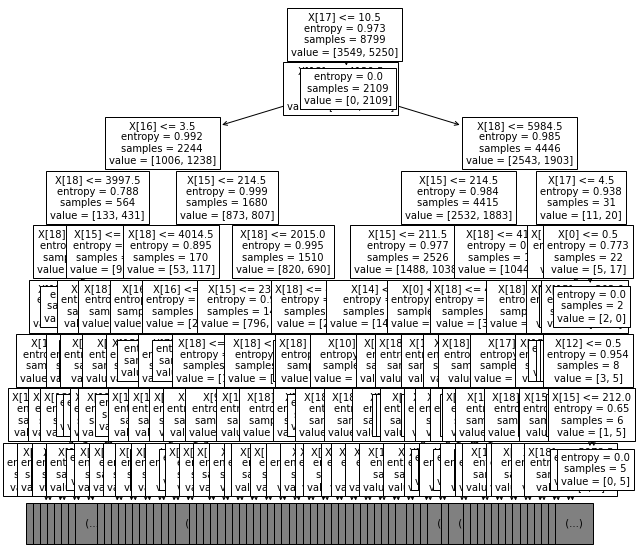

In [474]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf1, fontsize = 10, max_depth=8)

plt.show()

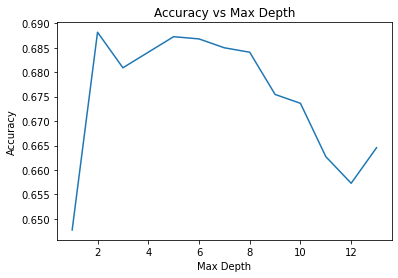

max_depth,1,2,3,4,5,6,7,8,9,10,11,12,13
accuracy,0.647727,0.688182,0.680909,0.684091,0.687273,0.686818,0.685,0.684091,0.675455,0.673636,0.662727,0.657273,0.664545


In [475]:
max_depth_range = list(range(1, 14))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf1 = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 42)
    clf1.fit(X_train_c, y_train_c)
    score = clf1.score(X_test_c, y_test_c)
    accuracy.append(score)

# plot the line plot
plt.plot(max_depth_range, accuracy)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.show()
pd.DataFrame([accuracy],
             columns=pd.Series(max_depth_range,name='max_depth'),
             index=["accuracy"])


**1.9: Prune the tree using one of the techniques discussed in class and evaluate the performance.**

**Print the optimal value of the tuned parameter.**

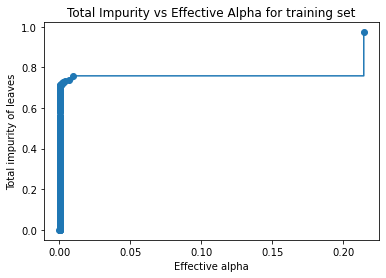

In [491]:
path = clf1.cost_complexity_pruning_path(X_train_c, y_train_c)
pathDF=pd.DataFrame(path)
# Plot the pruning curve
fig, ax = plt.subplots()
ax.plot(path.ccp_alphas, path.impurities, marker='o', drawstyle="steps-post")
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Total Impurity vs Effective Alpha for training set")
plt.show()
#To select the optimal value of alpha, we want to find the point on the curve that balances simplicity and accuracy. 
#This can be done by visually inspecting the curve or by using a metric such as cross-validation 
#to evaluate the accuracy of the pruned tree at different values of alpha.

In [477]:
pathDF=pd.DataFrame(path)
pathDF.ccp_alphas[:-1]

0      0.000000
1      0.000042
2      0.000058
3      0.000064
4      0.000068
         ...   
203    0.000736
204    0.001166
205    0.001858
206    0.003576
207    0.006458
Name: ccp_alphas, Length: 208, dtype: float64

Text(0.5, 0.98, 'Effective Alpha Based on Depth & Accuracy Scores')

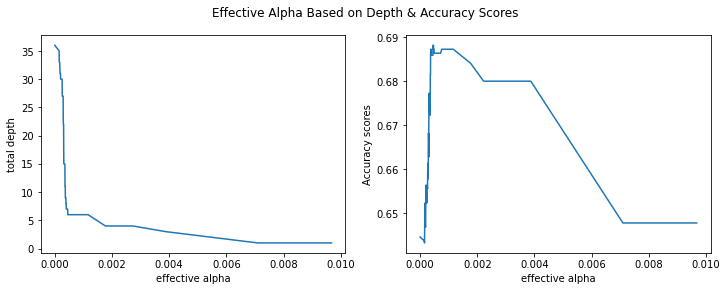

In [492]:
#finding the optimal value of alpha: 
from sklearn.metrics import accuracy_score

clfs=[]
ccp_alphas, impurities = path.ccp_alphas, path.impurities
for ccp_alpha in path.ccp_alphas:
    clf= DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train_c, y_train_c)
    clfs.append(clf)

tree_depths=[clf.tree_.max_depth for clf in clfs]
tree_depths
fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(ccp_alphas[:-1], tree_depths[:-1])
ax[0].set_xlabel("effective alpha")
ax[0].set_ylabel("total depth")

acc_scores= [accuracy_score(y_test_c, clf.predict(X_test_c)) for clf in clfs]
ax[1].plot(ccp_alphas[:-1], acc_scores[:-1])
ax[1].set_xlabel("effective alpha")
ax[1].set_ylabel("Accuracy scores")
fig.suptitle('Effective Alpha Based on Depth & Accuracy Scores')


In [ ]:
np.array(acc_scores[:-1])

array([0.64954545, 0.64954545, 0.64954545, 0.65      , 0.65      ,
       0.65      , 0.65      , 0.65      , 0.65      , 0.64909091,
       0.64909091, 0.64909091, 0.64818182, 0.64818182, 0.64909091,
       0.64909091, 0.64954545, 0.64954545, 0.65045455, 0.64954545,
       0.64954545, 0.64954545, 0.64909091, 0.64909091, 0.64909091,
       0.64909091, 0.64818182, 0.64818182, 0.64727273, 0.64727273,
       0.64636364, 0.64636364, 0.64636364, 0.64636364, 0.64636364,
       0.64590909, 0.64727273, 0.64727273, 0.64772727, 0.64727273,
       0.64772727, 0.64772727, 0.64727273, 0.64636364, 0.64545455,
       0.64454545, 0.64454545, 0.64454545, 0.64454545, 0.64454545,
       0.64454545, 0.64454545, 0.64454545, 0.64454545, 0.64454545,
       0.64454545, 0.64454545, 0.64454545, 0.64454545, 0.64454545,
       0.64363636, 0.64363636, 0.64318182, 0.64363636, 0.64363636,
       0.64454545, 0.64727273, 0.64727273, 0.64590909, 0.64590909,
       0.64681818, 0.64681818, 0.64727273, 0.64818182, 0.64818

In [497]:
## YOUR CODE HERE
# Define the parameter grid to search over
from sklearn.model_selection import GridSearchCV

clf1 = DecisionTreeClassifier(criterion='entropy')

# fit the decision tree on the development data
clf1=clf1.fit(X_train_c, y_train_c)
param_grid = {
    'ccp_alpha': [0.0,0.0006,0.0009, 0.005,0.01, 0.05, 0.1, 0.5, 1.0]
}

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(clf1, param_grid, cv=5)
grid_search.fit(X_train_c, y_train_c)

# Get the best alpha value from the grid search
best_alpha = grid_search.best_params_['ccp_alpha']
print(f"the best alpha is {best_alpha}")
# Prune the decision tree using the best alpha value
pruned_tree = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=42)
pruned_tree.fit(X_train_c, y_train_c)

# Evaluate the performance of the pruned tree
pruned_tree_score = pruned_tree.score(X_test_c, y_test_c)
pruned_tree_score

the best alpha is 0.0


0.6445454545454545

In [498]:
index_max = np.argmax(np.array(acc_scores[:-1]))
index_max
best_alpha1 = ccp_alphas[index_max]
best_alpha1
print("The best performance on test data is : {:.5f}, and the corresponding alpha value is {:.5f}".format(acc_scores[index_max], best_alpha1))

The best performance on test data is : 0.68818, and the corresponding alpha value is 0.00045


In [500]:
best_alpha1
# Accuracy score
print("Train score : {} ".format(clf.score(X_train_c, y_train_c)))
print("Test score : {} ".format(clf.score(X_test_c, y_test_c)))

Train score : 0.5966587112171837 
Test score : 0.5968181818181818 


**1.10: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

- be care when combining the names (ohe + num), the order matters since it can affect the sorting process a lot.
- in the sample answer key, zip & sort woule be in wrong order if the name in the wrong position.

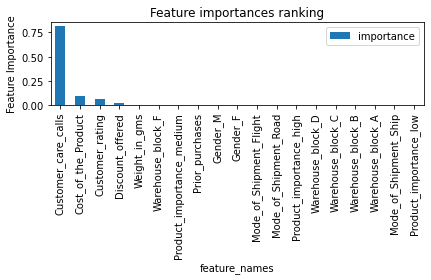

In [566]:
# Select the best accuracy alpha values and train again
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha1)
clf.fit(X_train_c, y_train_c)

#Computing importance features
importances = clf.feature_importances_
importances
#get the names for features
num_features = ['Weight_in_gms', 'Prior_purchases',
                'Discount_offered', 'Customer_rating',
                'Customer_care_calls', 'Cost_of_the_Product']
ohe_feature_names = preprocess.named_transformers_["onehotencoder"].get_feature_names_out()
feature_names = ohe_feature_names.tolist() + num_features
feature_names
data={'importance':importances,
      'feature_names': feature_names}
df = pd.DataFrame(data).sort_values('importance', ascending=False)
df

fig, ax = plt.subplots()
df.plot.bar(x='feature_names', y='importance', rot=90, ax=ax)
ax.set_title("Feature importances ranking")
ax.set_ylabel("Feature Importance")
fig.tight_layout()


In [568]:

importances.argsort()[::-1]


array([17, 18, 15, 16, 14, 13,  0, 10,  7,  4,  9,  6,  3, 11, 12,  1,  5,
        8,  2])

## Question 2: Random Forests

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Use accuracy and F1 score to evaluate. Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.7)?**

- Yes. The score is higher for random forest 

In [648]:
X_test_c

array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+00, 5.900e+01,
        3.088e+03],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 4.000e+00, 2.900e+01,
        3.496e+03],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 2.000e+00, 3.600e+01,
        3.819e+03],
       ...,
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 4.000e+00, 2.000e+00,
        1.830e+03],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 5.000e+00, 9.000e+00,
        1.603e+03],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 5.000e+00, 4.000e+00,
        1.155e+03]])

In [658]:
## YOUR CODE HERE

from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import f1_score

rfc = RandomForestClassifier()
rfc=rfc.fit(X_train_c, y_train_c)


y_pred_test_rfc = rfc.predict(X_test_c)
test_acc_rfc = sum(np.where(y_pred_test_rfc == y_test_c, 1, 0))/y_test_c.shape[0]
print(f'test_acc_rfc is {test_acc_rfc:.4f}')
acc_score=rfc.score(X_test_c, y_test_c)
print(f' Random_Forests.acc_score on test data is {acc_score:.4f}')
print(f"Decision_Tree.Accuracy on test data is: {accuracy_test:.3f}")
prfs = f1_score(y_test_c,y_pred_test_rfc)
print("Test data F1 score: ", f1_score(y_test_c, y_pred_test_rfc))

#F-1 score: a single value that summarizes the model's performance in binary classification.
#  Essentially, it balances the precision and reall when the data are imbalanced as a good measure. 
#precision: the ratio of true positive 
# 
# 
#  of the total positive prediction (true pos + false pos)
#recall: the ratio of actual positive instance out of the actual positive rediction (true pos+ false neg)

test_acc_rfc is 0.6636
 Random_Forests.acc_score on test data is 0.6636
Decision_Tree.Accuracy on test data is: 0.639
Test data F1 score:  0.6959737058340181


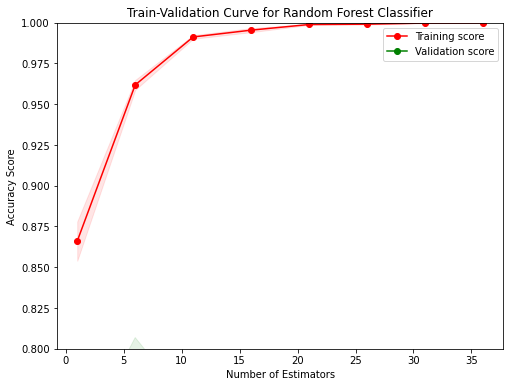

In [662]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import numpy as np

# define the range of values for the hyperparameter to tune
n_estimators_range = np.arange(1, 40, 5)

# define the random forest classifier
#rfc = RandomForestClassifier()

# compute the train-validation curve using 5-fold cross-validation
train_scores, valid_scores = validation_curve(rfc, X_train_c, y_train_c,
                                              param_name='n_estimators', 
                                              param_range=n_estimators_range,
                                              cv=5, scoring='accuracy')

# compute the mean and standard deviation of the train-validation scores
mean_train_scores = np.mean(train_scores, axis=1)
std_train_scores = np.std(train_scores, axis=1)
mean_valid_scores = np.mean(valid_scores, axis=1)
std_valid_scores = np.std(valid_scores, axis=1)

# plot the train-validation curve
plt.figure(figsize=(8, 6))
plt.title('Train-Validation Curve for Random Forest Classifier')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy Score')
plt.ylim(0.8, 1.0)
plt.fill_between(n_estimators_range, mean_train_scores - std_train_scores, 
                 mean_train_scores + std_train_scores, alpha=0.1, color='r')
plt.fill_between(n_estimators_range, mean_valid_scores - std_valid_scores, 
                 mean_valid_scores + std_valid_scores, alpha=0.1, color='g')
plt.plot(n_estimators_range, mean_train_scores, 'o-', color='r', label='Training score')
plt.plot(n_estimators_range, mean_valid_scores, 'o-', color='g', label='Validation score')
plt.legend(loc='best')
plt.show()


**2.2: Do all trees in the trained random forest model have pure leaves? How would you verify that all trees have pure leaves? Print the score (mean accuracy) values of your choosen method**

In [660]:

trees = rfc.estimators_
trees[0].tree_.children_left
trees[0].tree_.impurity


scores=[]
for e in rfc.estimators_ :
  training_score = e.score(X_test_c, y_test_c)
  scores.append(training_score)
pd.DataFrame(scores)

,0
0,0.634545
1,0.638182
2,0.642273
3,0.641364
4,0.652727
...,...
95,0.631818
96,0.655455
97,0.634545
98,0.640455


In [606]:
def bfs(clf):
    '''Implementing Breadth First Search to find the Impurities in the Leaf Nodes'''
    q = [0]
    l_c = clf.tree_.children_left
    r_c = clf.tree_.children_right
    imp = clf.tree_.impurity
    imp_leaf = []
    while q:
        temp = q.pop(0)
        # If left child and right child are same it means that it is a leaf node.
        if l_c[temp] == r_c[temp]:
            impurity = imp[temp]
            imp_leaf.append(impurity)
        else:
            q.append(l_c[temp])
            q.append(r_c[temp])
    return imp_leaf

trees = rfc.estimators_
for dec_tree in trees:
    leaf_node_impurity = bfs(dec_tree)
    assert all(leaf_node_impurity) == 0.0

Mean score:0.6003


**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**


- I choose n_estimators (control the # of trees) and "min samples split" (can help control overfitting by limiting the number of min samples in splits).

In [663]:
## YOUR SOLUTION HERE

# Specify the hyperparameter space to search
param_grid = {'n_estimators': [10, 20, 30, 50, 70], #The number of decision trees in the forest. 
              #Increasing this value may improve the model's performance, but also increases the training time and memory usage.
              "min_samples_split":  [8,10,12,13,15]}

# # Perform grid search to find the best hyperparameters
# grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5)
# grid_search.fit(X_train_c, y_train_c)

# # Print the best hyperparameters and mean score
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Mean score: ", grid_search.best_score_)

**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

In [673]:
## YOUR SOLUTION HERE
params = {"n_estimators":[50,80,100,130,150],
              "min_samples_split":  [8,10,12,13,15]}


- I chose the max_features since it only 3-5 features that affect the model performance while we have multiple columns to fit the Model.
- I choose the estimator: 


**2.5: Perform model selection using the chosen values for the hyperparameters. Use out-of-bag (OOB) error for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on train and test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

In [676]:
# Initialize the random forest classifier
rf = RandomForestClassifier(oob_score=True, random_state=42)

# # Use GridSearchCV to search over the parameter grid and find the best set of hyperparameters
# grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1, scoring='neg_mean_squared_error')
# grid_search.fit(X_train_c, y_train_c)
from sklearn.model_selection import ParameterGrid
best_score=-1

for g in ParameterGrid(params):
    rf.set_params(**g)
    rf.fit(X_train_c, y_train_c)
    if rf.oob_score > best_score:
        best_score= rf.oob_score_
        best_grid=g
print("OOB: %0.5f"%best_score)
print("Grid:", best_grid)

OOB: 0.66417
Grid: {'min_samples_split': 15, 'n_estimators': 150}
0.6641663825434708


In [690]:
# Train a random forest model on the full training set with the optimal hyperparameters
rf_optimal = RandomForestClassifier(min_samples_split = best_grid["min_samples_split"], 
                                         n_estimators = best_grid["n_estimators"], random_state=42)
rf_optimal.fit(X_train_c, y_train_c)

y_pred_test_rf_opt = rf_optimal.predict(X_test_c)
test_acc_rf_opt = sum(np.where(y_pred_test_rf_opt == y_test_c, 1, 0))/y_test_c.shape[0]
print(f'test_acc_rf_opt is {test_acc_rf_opt:.4f}')
acc_score_opt=rf_optimal.score(X_test_c, y_test_c)
print(f'Optimal_model.acc_score on test data is {acc_score_opt:.4f}')

f1_score_opt=f1_score(y_pred_test_rf_opt, y_test_c)
print(f"F1 Score :{f1_score_opt:.4f} ")
print("Train accuray : {} ".format(accuracy_score(rf_optimal.predict(X_train_c),y_train_c)))

test_acc_rf_opt is 0.6718
Optimal_model.acc_score on test data is 0.6718
F1 Score :0.6864 
Train accuray : 0.9374928969201045 


 **2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.10? If they differ, which feature set makes more sense?**
 - Yes. they are the same. 

[0.00911099 0.00901477 0.01008755 0.00881087 0.00947627 0.00946339
 0.00962749 0.01044074 0.007304   0.009241   0.00895997 0.00766772
 0.00843684 0.04557117 0.04004695 0.13451623 0.05577068 0.30269266
 0.3037607 ]


/Users/liangzhao/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


['feature 0',
 'feature 1',
 'feature 2',
 'feature 3',
 'feature 4',
 'feature 5',
 'feature 6',
 'feature 7',
 'feature 8',
 'feature 9',
 'feature 10',
 'feature 11',
 'feature 12',
 'feature 13',
 'feature 14',
 'feature 15',
 'feature 16',
 'feature 17',
 'feature 18']

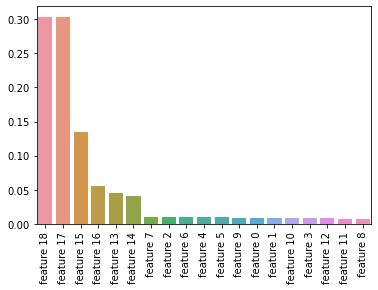

In [709]:
feature_names = [f"feature {i}" for i in range(X_train_c.shape[1])]
feat_imps = zip(feature_names, rf_optimal.feature_importances_)
print(rf_optimal.feature_importances_)
feats, imps = zip(*(sorted(list(filter(lambda x:x[1] !=0, feat_imps)), key=lambda x: x[1], reverse=True)))
feats, imps
ax = sns.barplot(list(feats),list(imps))
ax.tick_params(axis="x", rotation=90)

feature_names

In [688]:
## YOUR CODE HERE
#Computing importance features
importances_opt = rf_optimal.feature_importances_
data_opt={'importances_opt':importances_opt,
      'feature_names': feature_names}
df_opt = pd.DataFrame(data_opt).sort_values('importances_opt', ascending=False)
df_opt

,importances_opt,feature_names
18,0.303761,Cost_of_the_Product
17,0.302693,Customer_care_calls
15,0.134516,Discount_offered
16,0.055771,Customer_rating
13,0.045571,Weight_in_gms
14,0.040047,Prior_purchases
7,0.010441,Warehouse_block_F
2,0.010088,Mode_of_Shipment_Ship
6,0.009627,Warehouse_block_D
4,0.009476,Warehouse_block_B


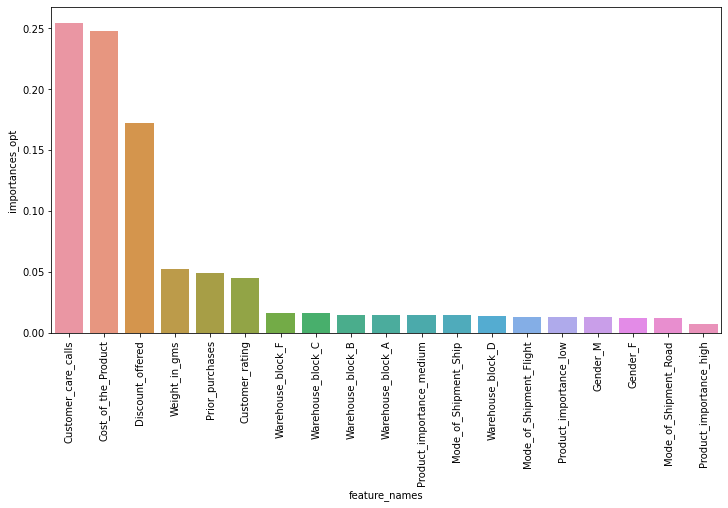

In [634]:

plt.figure(figsize = (12, 6))
ax = sns.barplot(x = df_opt.feature_names, y = df_opt.importances_opt)
ax.tick_params(axis = 'x', rotation = 90)

## Question 3: Gradient Boosted Trees

**3.1: Choose three hyperparameters to tune HistGradientBoostingClassifier on the development dataset using 5-fold cross validation. For each hyperparmeter, give it 3 potential values. Report on the time taken to do model selection for the model. Also, report the performance of the test dataset from the optimal models.**

In [635]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import time

/Users/liangzhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [757]:
## YOUR CODE HERE
from sklearn.model_selection import StratifiedKFold
t = time.time()
param_grid =  {'learning_rate':[0.1, 0.01, 0.001], 
               'max_depth':[3, 6, 9],
               'l2_regularization': np.logspace(-3, -1, 3)}

# Initialize HistGradientBoostingClassifier
# Perform grid search with 5-fold cross-validation
clf_hgb = make_pipeline(preprocess, 
                        GridSearchCV(estimator = HistGradientBoostingClassifier(random_state=10), 
                                     param_grid = param_grid,
                                     cv=StratifiedKFold(n_splits=5, shuffle=False) 
                                     # It splits the dataset into k folds, 
                                     #ensuring that each fold has the same proportion of target classes as the complete dataset.
                                     )
                        )


clf_hgb.fit(X_dev_before_transform, y_train_c)

print(f'time cost:{time.time()-t:.8f}s')
print("best hyperparameters:", clf_hgb["gridsearchcv"].best_params_)
print("mean cross-validated score with best hyperparameters:", clf_hgb["gridsearchcv"].best_score_)
# # Report on optimal hyperparameters
# print("Optimal hyperparameters:", grid_search.best_params_)


time cost:132.58201313s
best hyperparameters: {'l2_regularization': 0.001, 'learning_rate': 0.1, 'max_depth': 6}
mean cross-validated score with best hyperparameters: 0.60072968887281


In [727]:

print("Based on the above  best parameters, we can fit the histGradientBoostingCalssifier")
clf_hgb_best=HistGradientBoostingClassifier(learning_rate=clf_hgb["gridsearchcv"].best_params_['learning_rate'],
                                            max_depth=clf_hgb["gridsearchcv"].best_params_['max_depth'], 
                                         l2_regularization = clf_hgb["gridsearchcv"].best_params_['l2_regularization'],
                                         random_state=10)
clf_hgb_best.fit(X_train_c, y_train_c)
y_pred=clf_hgb_best.predict(X_test_c)
score_hgb=accuracy_score(y_test_c, y_pred)
print("Accuracy for GradientBoostingClassifier on testing data with best hyperparameters:", score_hgb)
print(classification_report(y_test_c, y_pred))

Based on the above  best parameters, we can fit the histGradientBoostingCalssifier
Accuracy for GradientBoostingClassifier on testing data with best hyperparameters: 0.6759090909090909
              precision    recall  f1-score   support

           0       0.57      0.81      0.67       887
           1       0.82      0.58      0.68      1313

    accuracy                           0.68      2200
   macro avg       0.70      0.70      0.68      2200
weighted avg       0.72      0.68      0.68      2200



**3.2: Repeat 3.1 for XGBoost.**

**Note**: For XGBoost, you **DO NOT NEED** to choose the same hyperparameters as HistGradientBoostingClassifier.

In [728]:
## YOUR CODE HERE
#!pip install xgboost
from xgboost import XGBClassifier
t=time.time()
param_XG = {'learning_rate':[0.05, 0.01, 0.005], 
               'n_estimators':[20, 30, 40], 
               'max_depth':[3, 6, 9]}

# Initialize HistGradientBoostingClassifier
clf = XGBClassifier(random_state=10)


clf_XG = make_pipeline(preprocess, 
                        GridSearchCV(estimator = clf , 
                                     param_grid = param_XG,
                                     cv=StratifiedKFold(n_splits=5, shuffle=False) 
                                     # It splits the dataset into k folds, 
                                     #ensuring that each fold has the same proportion of target classes as the complete dataset.
                                     )
                        )


clf_XG.fit(X_dev_before_transform, y_train_c)

print(f'clf_XG time cost:{time.time()-t:.8f}s')
print("clf_XG best hyperparameters:", clf_XG["gridsearchcv"].best_params_)
print("mean cross-validated score with best hyperparameters clf_XG:", clf_XG["gridsearchcv"].best_score_)


clf_XG time cost:131.56646609s
clf_XG best hyperparameters: {'learning_rate': 0.005, 'max_depth': 6, 'n_estimators': 20}
mean cross-validated score with best hyperparameters clf_XG: 0.6062953511809396


In [734]:
print("Based on the above  best parameters, we can fit the  XGBoostingCalssifier")
clf_XG_best=XGBClassifier(learning_rate=clf_XG["gridsearchcv"].best_params_['learning_rate'],
                                            max_depth=clf_XG["gridsearchcv"].best_params_['max_depth'], 
                                         n_estimators = clf_XG["gridsearchcv"].best_params_['n_estimators'],
                                         random_state=10)
clf_XG_best.fit(X_train_c, y_train_c)
y_pred=clf_XG_best.predict(X_test_c)
score_XG=accuracy_score(y_test_c, y_pred)
print(f"Accuracy for XGBClassifier on testing data with best hyperparameters: {score_XG:.4f}")
print(classification_report(y_test_c, y_pred))

Based on the above  best parameters, we can fit the  XGBoostingCalssifier
Accuracy for XGBClassifier on testing data with best hyperparameters: 0.6877
              precision    recall  f1-score   support

           0       0.57      0.97      0.71       887
           1       0.96      0.50      0.66      1313

    accuracy                           0.69      2200
   macro avg       0.76      0.73      0.69      2200
weighted avg       0.80      0.69      0.68      2200



**3.3: Compare the results on the test dataset of XGBoost and HistGradientBoostingClassifier. Which model do you prefer and why?**

In [735]:
## YOUR CODE HERE
print(f"Accuracy for GradientBoostingClassifier on testing data with best hyperparameters: {score_hgb:.4f}")
print(f"Accuracy for XGBClassifier on testing data with best hyperparameters: {score_XG:.4f}")

Accuracy for GradientBoostingClassifier on testing data with best hyperparameters: 0.6759
Accuracy for XGBClassifier on testing data with best hyperparameters: 0.6877


**3.4: Can you list the top 3 important features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree?**

17    Customer_care_calls
16        Customer_rating
18    Cost_of_the_Product
13          Weight_in_gms
Name: feature_names, dtype: object

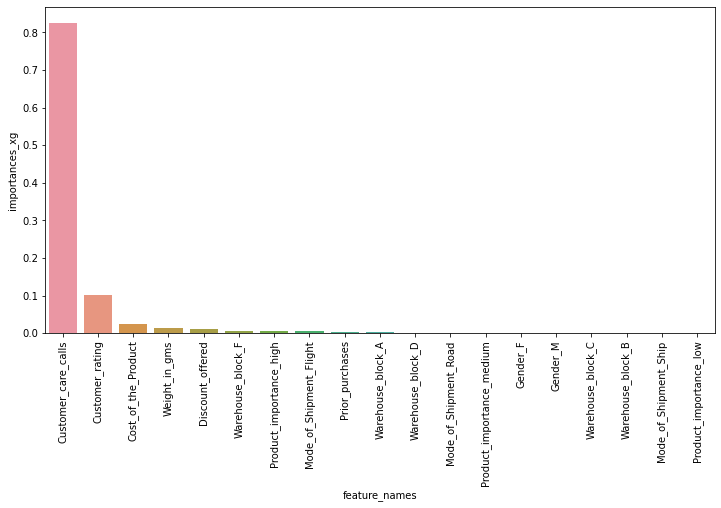

In [743]:
## YOUR CODE HERE
#Computing importance features

#get the names for features
num_features = ['Weight_in_gms', 'Prior_purchases',
                'Discount_offered', 'Customer_rating',
                'Customer_care_calls', 'Cost_of_the_Product']
ohe_feature_names = preprocess.named_transformers_["onehotencoder"].get_feature_names_out()
feature_names = ohe_feature_names.tolist() + num_features
feature_names


importances_xg = clf_XG_best.feature_importances_
data_opt={'importances_xg':importances_xg,
      'feature_names': feature_names}
df_xg = pd.DataFrame(data_opt).sort_values('importances_xg', ascending=False)
df_xg.feature_names[:4]
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = df_xg.feature_names, y = df_xg.importances_xg)
ax.tick_params(axis = 'x', rotation = 90)
df_xg.feature_names[:4]


**3.5: Can you choose the top 5 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

In [749]:
## YOUR CODE HERE
feats_5=list(df_xg.feature_names[:5])
feats_5

X_dev_new = X_dev_new = pd.DataFrame(X_dev, columns = feats_5)
X_dev_new = X_dev_new[feats_5]
X_dev_new.head()
X_dev_new = X_dev_new.to_numpy()
X_dev_new

array([[   4,    2,  177, 1233,   44],
       [   2,    2,  183, 3374,   48],
       [   3,    3,  176, 1177,   10],
       ...,
       [   4,    1,  232, 1247,    6],
       [   5,    2,  223, 1210,    2],
       [   2,    5,  155, 1639,    6]])

In [750]:
t = time.time()
param = {'learning_rate':[0.05, 0.01, 0.005], 
               'n_estimators':[20, 30, 40], 
               'max_depth':[3, 6, 9]}
clf_xgb_new = make_pipeline(GridSearchCV(estimator = XGBClassifier(random_state=10), 
                           param_grid = param,
                           cv=StratifiedKFold(n_splits=5, shuffle=False)))
clf_xgb_new.fit(X_dev_new,y_train_c)
print(f'cost clf_xgb_new:{time.time()-t:.8f}s')

cost:32.22341514s


In [751]:
print("best hyperparameters:", clf_xgb_new["gridsearchcv"].best_params_)
print("best scores:", clf_xgb_new["gridsearchcv"].best_score_)

best hyperparameters: {'learning_rate': 0.005, 'max_depth': 6, 'n_estimators': 20}
best scores: 0.6029999612383069


In [755]:
clf_xgb_new_best = XGBClassifier(learning_rate = clf_xgb_new["gridsearchcv"].best_params_["learning_rate"], 
                                         max_depth = clf_xgb_new["gridsearchcv"].best_params_["max_depth"], 
                                         n_estimators = clf_xgb_new["gridsearchcv"].best_params_["n_estimators"],
                                         random_state=10)
clf_xgb_new_best.fit(X_train_c, y_train_c)
y_pred = clf_xgb_new_best.predict(X_test_c)
score_xgb_new = accuracy_score(y_test_c, y_pred)
print(f"Accuracy for XGBoost on testing data with best hyperparameters: {score_xgb_new:.4f}")
print("the performance of those 2 model are very similar since  the features other than the top five don't play a big role in this model")

Accuracy for XGBoost on testing data with best hyperparameters: 0.6877
the performance of those 2 model are very similar since  the features other than the top five don't play a big role in this model


## Question 4: Calibration

**4.1: Estimate the brier score for the HistGradientBoosting model (trained with optimal hyperparameters from Q3.1) scored on the test dataset.**

In [756]:
## YOUR CODE HERE
X_train, X_calib, y_train, y_calib = train_test_split(X_dev_before_transform, y_train_c, test_size = 0.20, random_state = 0)

In [758]:
clf_hgb_baseline = make_pipeline(preprocess,
                                 HistGradientBoostingClassifier(learning_rate = clf_hgb["gridsearchcv"].best_params_["learning_rate"], 
                                         max_depth = clf_hgb["gridsearchcv"].best_params_["max_depth"], 
                                         l2_regularization = clf_hgb["gridsearchcv"].best_params_['l2_regularization'],
                                         random_state=10))
clf_hgb_baseline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Mode_of_Shipment',
                                                   'Warehouse_block',
                                                   'Product_importance',
                                                   'Gender'])])),
                ('histgradientboostingclassifier',
                 HistGradientBoostingClassifier(l2_regularization=0.001,
                                                max_depth=6,
                                                random_state=10))])

In [760]:
probs = clf_hgb_baseline.predict_proba(X_test_before_transform)[:, 1]
loss_hgb = brier_score_loss(y_test_c, probs)
print("brier score for the XGBoost Model:", loss_hgb)

brier score for the XGBoost Model: 0.18292065336936802


**4.2: Calibrate the trained HistGradientBoosting model using Platt Scaling. Print the brier score after calibration and plot predicted v.s. actual on test datasets from the calibration method.**

brier score for the XGBoost Model with platt scaling: 0.17965134920246054


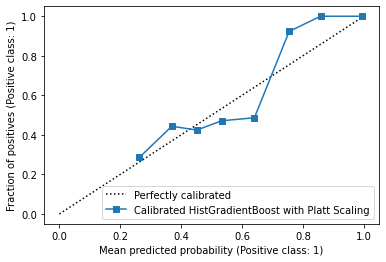

In [765]:
## YOUR CODE HERE
from sklearn.calibration import CalibrationDisplay, CalibratedClassifierCV
clf_hgb_platt = CalibratedClassifierCV(clf_hgb_baseline, cv="prefit", method="sigmoid")
clf_hgb_platt.fit(X_calib, y_calib)
display = CalibrationDisplay.from_estimator(
    clf_hgb_platt, X_test_before_transform, y_test_c, n_bins=10, name = "Calibrated HistGradientBoost with Platt Scaling"
)

probs = clf_hgb_platt.predict_proba(X_test_before_transform)[:,1]
loss_hgb_platt = brier_score_loss(y_test_c, probs)
print("brier score for the XGBoost Model with platt scaling:", loss_hgb_platt)

**4.3: Compare the brier scores from 4.1 and 4.2. Do the calibration methods help in having better predicted probabilities?**

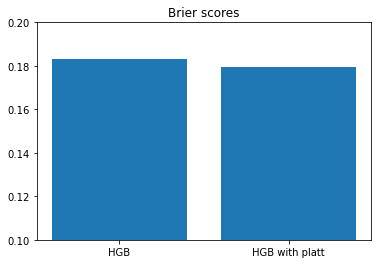

Calibration method help a little bit in having better predicted probabilities.


In [767]:
## YOUR CODE HERE
plt.bar(x = ["HGB", "HGB with platt"], height = [loss_hgb, loss_hgb_platt])
plt.ylim(0.1, 0.20)
plt.title("Brier scores")
plt.show()

print("Calibration method help a little bit in having better predicted probabilities.")